In [1]:
# Setting up the Colab environment. DO NOT EDIT!
import os
import warnings
warnings.filterwarnings("ignore")

try:
    import otter

except ImportError:
    ! pip install -q otter-grader==4.0.0
    import otter

if not os.path.exists('walkthrough-tests'):
    zip_files = [f for f in os.listdir() if f.endswith('.zip')]
    assert len(zip_files)>0, 'Could not find any zip files!'
    assert len(zip_files)==1, 'Found multiple zip files!'
    ! unzip {zip_files[0]}

grader = otter.Notebook(colab=True,
                        tests_dir = 'walkthrough-tests')

# Lab

Remember, all assignments are due at 11:59 PM (Philadelphia time) on the Sunday of each instructional week.

## Learning Objectives
At the end of this learning activity you will be able to: 
 - Employ `pg.chi2_independence` to estimate the correlation between two categorical variables.
 - Practice testing variables for normality.
 - Employ `pg.ttest`, `pg.anova`, and `pg.kruskal` to look for differences in a dependent variable between different categorical variables.

# Introduction

In this lab you will explore the effects of antiretroviral medications on neurological impairment.
In this cohort, we have two major drug regimens, d4T (Stavudine) and the newer Emtricitabine/tenofovir (Truvada).
The older Stavudine is suspected to have neurotoxic effects that are not found in the newer Truvada.

In order to evaluate this effect, the participants in this cohort have completed an extensive neuropsychological exam that measures each 6 domains of neurocognition:
* Processing Speed
* Executive Function
* Language
* Visuospatial processing
* Learning and Memory
* Motor Function

Each of these domains is measure by a number of tests.
The results of these tests are then compared to demographically matched individuals (age, race, gender, and education) in order to scale the values appropriately.

These values are on a _Z-scale_.
A z-scale is a tranformation such that the _mean_ is 0 and the _standard deviation_ is 1.
Therefore a person with a `motor_domain_z = 0` are performing at the _average_ of matched individuals.
A person with `motor_domain_z = -1` is performing 1 standard deviation below the average of matched individuals.

This leads to a scale of:
  * Z < -2 : Significant impairment
  * -2 < Z < -1 : Mild impairment
  * Z > -1  : No evidence of impairment

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import pingouin as pg

%matplotlib inline

In [3]:
data = pd.read_csv('hiv_neuro_data.csv')
data['education'] = data['education'].astype(float)
data.head()

,sex,age,education,race,processing_domain_z,exec_domain_z,language_domain_z,visuospatial_domain_z,learningmemory_domain_z,motor_domain_z,ART,YearsSeropositive
0,male,62,10.0,AA,0.5,0.6,0.151646,-1.0,-1.152131,-1.364306,Stavudine,13
1,male,56,10.0,AA,-0.5,1.2,-0.255505,-2.0,-0.086376,-0.348600,Truvada,19
2,female,51,10.0,AA,0.5,0.1,0.902004,-0.4,-1.139892,0.112215,Stavudine,9
3,female,47,12.0,AA,-0.6,-1.2,-0.119866,-2.1,0.803619,-2.276768,Truvada,24
4,male,46,13.0,AA,-0.4,1.3,0.079129,-1.3,-0.533607,-0.330541,Truvada,14


### Q1: How many participants are suffering from impairment?

Using the thresholds above, create a bar-chart which shows the number of individuals with mild or moderate impairment for each of the domains.

|               |    |
| --------------|----|
| Points        | 2  |
| Public Checks | 2  |
| Hidden Tests | 1  |

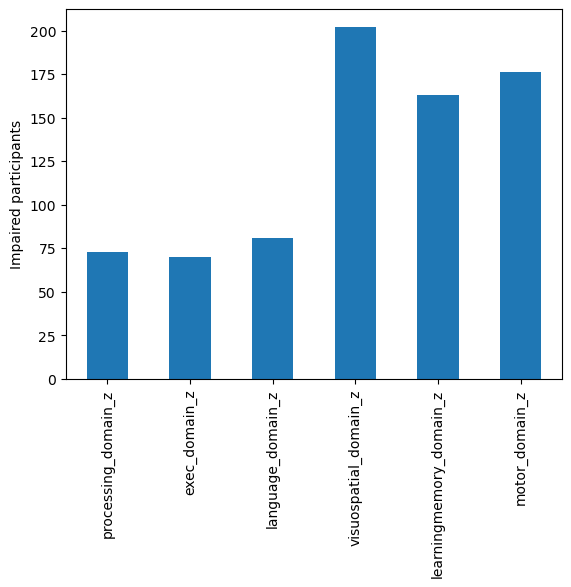

In [4]:
# BEGIN SOLUTION NO PROMPT

DOMAIN_COLS = ['processing_domain_z', 'exec_domain_z', 
               'language_domain_z', 'visuospatial_domain_z',
               'learningmemory_domain_z', 'motor_domain_z']

impairement_counts = (data[DOMAIN_COLS]<-1).sum(axis=0)

# Generate a figure
q1_plot = impairement_counts.plot(kind='bar')
q1_plot.set_ylabel('Impaired participants')

# END SOLUTION
""" # BEGIN PROMPT

# Generate a figure
q1_plot = ...


"""; # END PROMPT

In [5]:
# Which column has the most impaired individuals in this cohort?

q1_most_impaired = 'visuospatial_domain_z'  # SOLUTION

In [6]:
print('Is q1_plot a figure or axis:', isinstance(q1_plot, (plt.Axes, plt.Figure)))

Is q1_plot a figure or axis: True


In [7]:
print('Is q1_most_impaired is a column name:', q1_most_impaired in data.columns)

Is q1_most_impaired is a column name: True


In [8]:
# HIDDEN
print('Is q1_most_impaired =', q1_most_impaired)

Is q1_most_impaired = visuospatial_domain_z


### Q2: Is Visuospatial impairment linked with ART therapy?

Using the thresholds above, binarize indivduals based on their `visuospatial_domain_z` into impaired and non-impaired.
Then, use a chi2 test to measure the linkage between this and the ART therapy of the individual.

|               |    |
| --------------|----|
| Points        | 5  |
| Public Checks | 3  |
| Hidden Testss | 2  |

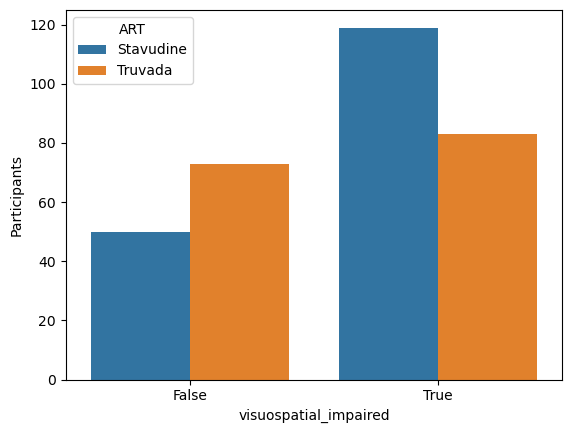

In [9]:
# Create a countplot which visualizes this comparison

# BEGIN SOLUTION NO PROMPT

data['visuospatial_impaired'] = data['visuospatial_domain_z'] < -1

q2_plot = sns.countplot(data = data,
                        hue = 'ART',
                        x = 'visuospatial_impaired')

q2_plot.set_ylabel('Participants')

# END SOLUTION
""" # BEGIN PROMPT

# Generate a figure showing this comparison
q2_plot = ...

"""; # END PROMPT

In [10]:
# Perform a chi2 test

# BEGIN SOLUTION NO PROMPT

expected, obs_cor, stats = pg.chi2_independence(data, 'visuospatial_impaired', 'ART')

# END SOLUTION
""" # BEGIN PROMPT

"""; # END PROMPT

In [11]:
# Is there a linkage between Visuospatial impairment and ART regimen? 'yes' or 'no'
q2_linkage = 'yes' # SOLUTION

# Which therapy is leading to more impairment? 'Stavudine' or 'Truvada'
q2_therapy = 'Stavudine'

In [12]:
print('Is q2_plot a figure or axis:', isinstance(q2_plot, (plt.Axes, plt.Figure)))

Is q2_plot a figure or axis: True


In [13]:
print('Is q2_linkage a yes or no?', q2_linkage.lower() in {'yes', 'no'})

Is q2_linkage a yes or no? True


In [14]:
print('Is q2_therapy Stavudine or Truvada?', q2_therapy in {'Stavudine', 'Truvada'})

Is q2_therapy Stavudine or Truvada? True


In [15]:
# HIDDEN
print('Is q2_linkage =', q2_linkage)

Is q2_linkage = yes


In [16]:
# HIDDEN
print('Is q2_therapy =', q2_therapy)

Is q2_therapy = Stavudine


### Q3: Is Visuospatial **score** linked with ART therapy?

Evaluate the normality of the `visuospatial_domain_z` and then choose the appropriate test between the two therapies.

Refer to the pingouin guidelines: https://pingouin-stats.org/build/html/guidelines.html

|               |    |
| --------------|----|
| Points        | 5  |
| Public Checks | 3  |
| Hidden Testss | 2  |

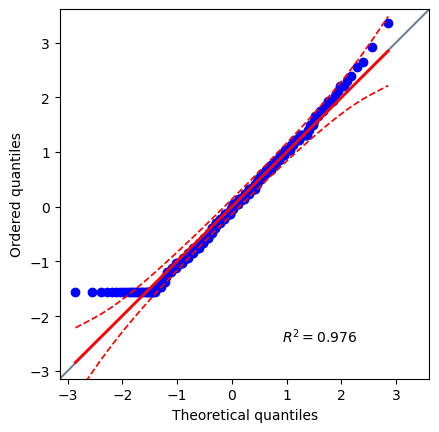

In [17]:
# Asses the normality of the visuospatial_domain_z scale

# BEGIN SOLUTION NO PROMPT

pg.qqplot(data['visuospatial_domain_z'], dist='norm')
pg.normality(data['visuospatial_domain_z'], method='normaltest')
pg.normality(data['visuospatial_domain_z'], method='jarque_bera')

# END SOLUTION

# Answer yes or no.
q3_is_normal = 'no' # SOLUTION

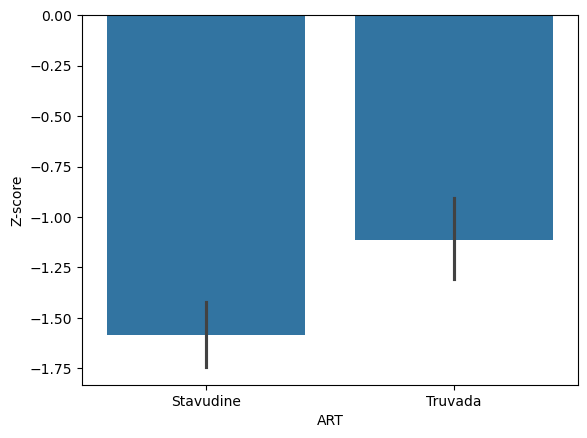

In [18]:
# BEGIN SOLUTION NO PROMPT

q3_plot = sns.barplot(data = data,
                      x = 'ART',
                      y = 'visuospatial_domain_z')

q3_plot.set_ylabel('Z-score')

# END SOLUTION
""" # BEGIN PROMPT

# Generate a figure showing this comparison
q3_plot = ...

"""; # END PROMPT

In [19]:
# Using the appropriate test, determine whether there is a difference between ART regimens
# BEGIN SOLUTION NO PROMPT

strav_indivs = data.query('ART == "Stavudine"')
truv_indivs = data.query('ART == "Truvada"')

pg.mwu(strav_indivs['visuospatial_domain_z'],
       truv_indivs['visuospatial_domain_z'])
# END SOLUTION

,U-val,alternative,p-val,RBC,CLES
MWU,10101.0,two-sided,0.00027,0.233728,0.383136


In [20]:
# Is visuospatial_domain_z significantly different between ART regimens? 'yes' or 'no'
q3_sig_diff = 'yes' # SOLUTION

In [21]:
print('Is q3_is_normal a yes or no?', q3_is_normal.lower() in {'yes', 'no'})

Is q3_is_normal a yes or no? True


In [22]:
print('Is q3_plot a figure or axis:', isinstance(q3_plot, (plt.Axes, plt.Figure)))

Is q3_plot a figure or axis: True


In [23]:
print('Is q3_sig_diff a yes or no?', q3_sig_diff.lower() in {'yes', 'no'})

Is q3_sig_diff a yes or no? True


In [24]:
# HIDDEN
print('Is q3_is_normal =', q3_is_normal)

Is q3_is_normal = no


In [25]:
# HIDDEN
print('Is q3_sig_diff =', q3_sig_diff)

Is q3_sig_diff = yes


### Q4: Evaluate a potential covariate

ART use is likely not the only thing that impacts neurocognitive impairement.
Use similar methods to evaluate the impact of any of:
* sex
* race
* education
* age
* YearsSeropositivedata['YS_binned']

on `visuospatial_domain_z`.
You can use any comparison method we have discussed so far.

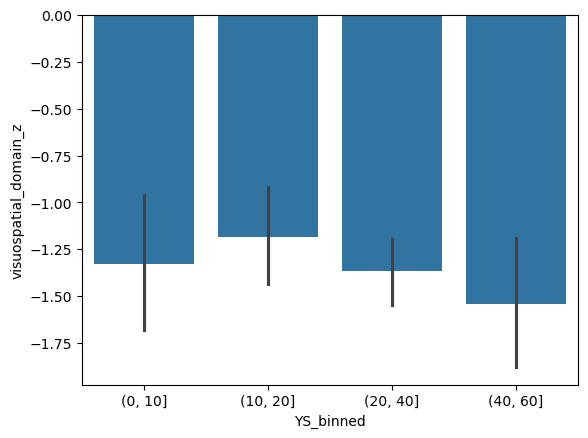

In [26]:
# BEGIN SOLUTION NO PROMPT

bins = [0, 10, 20, 40, 60]
data['YS_binned'] = pd.cut(data['YearsSeropositive'], bins)

# Generate a figure
q4_plot = sns.barplot(data = data,
                      x = 'YS_binned',
                      y = 'visuospatial_domain_z')
#q4_plot.set_xticklabels(data['YS_binned'].labels)
# END SOLUTION
""" # BEGIN PROMPT

# Generate a figure of your comparison
q4_plot = ...


"""; # END PROMPT

In [27]:
# Choose the appropriate test for your comparison
pg.kruskal(data, dv='visuospatial_domain_z', between='YS_binned') # SOLUTION

,Source,ddof1,H,p-unc
Kruskal,YS_binned,3,3.023362,0.388037


In [28]:
# Is there a linkage between Visuospatial domain and your covariate? 'yes' or 'no'
q4_is_sig = 'no' # SOLUTION

In [29]:
print('Is q4_plot a figure or axis:', isinstance(q4_plot, (plt.Axes, plt.Figure)))

Is q4_plot a figure or axis: True


In [30]:
print('Is q4_is_sig a yes or no?', q4_is_sig.lower() in {'yes', 'no'})

Is q4_is_sig a yes or no? True


In this lab you explored the linkage between ART regimens and visuospatial memory domain.
We utilized tools like chi2 tests and various means-tests to determine whether categorical varaibles were assotiated with impairement.
Next week we will utilize single and multiple regressions to compare continous varaibles to gain more statistical power.

--------------------------------------------

## Submission

Check:
 - That all tables and graphs are rendered properly.
 - Code completes without errors by using `Restart & Run All`.
 - All checks **pass**.
 
Then save the notebook and the `File` -> `Download` -> `Download .ipynb`. Upload this file to BBLearn.